In [2]:
# import necessary packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [3]:
# display images with the given title
def display_img(img_name, title, gray=True):
    if gray:
        plt.imshow(img_name, vmin=0, vmax=255, cmap="gray")
    else:
        plt.imshow(img_name.astype('uint8'),vmin=0,vmax=255)
    plt.title(title)
    plt.show()
        

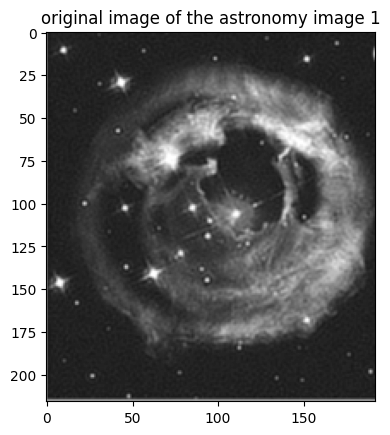

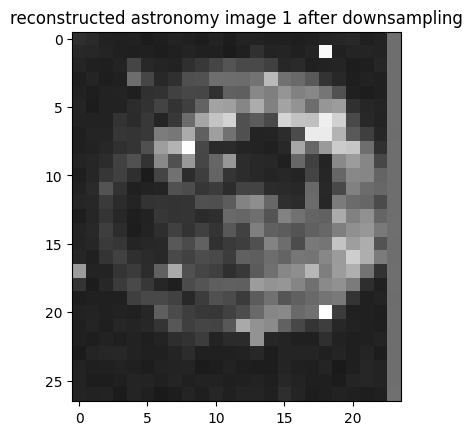

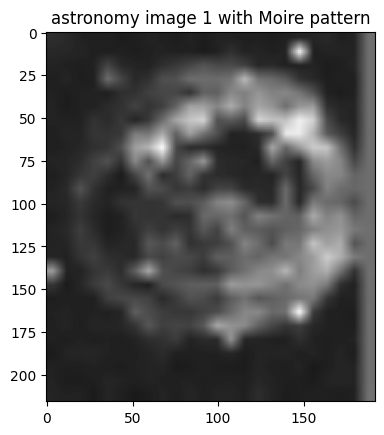

array([[ 47.,  47.,  47., ..., 110., 110., 110.],
       [ 47.,  47.,  47., ..., 110., 110., 110.],
       [ 47.,  47.,  47., ..., 110., 110., 110.],
       ...,
       [ 36.,  36.,  36., ..., 112., 112., 112.],
       [ 36.,  36.,  36., ..., 112., 112., 112.],
       [ 36.,  36.,  36., ..., 112., 112., 112.]])

In [4]:
def add_Moire_pattern(img_name,sample_rate,gray=True):
    # read the astronomy image
    # add the moire's pattern
    # do the downsampling
    if gray:
        Img_astronomy_1 = cv2.imread("./../images/"+img_name, cv2.IMREAD_GRAYSCALE)
        display_img(Img_astronomy_1, "original image of the astronomy image 1",True)
        M, N = Img_astronomy_1.shape
        Img_astronomy_1_reconstruct=np.zeros((M//sample_rate,N//sample_rate))
        for i in range(M):
            for j in range(N):
                if (i%sample_rate==0 and j%sample_rate==0):
                    
                    Img_astronomy_1_reconstruct[i//sample_rate-1,j//sample_rate-1]=Img_astronomy_1[i,j]
        display_img(Img_astronomy_1_reconstruct,"reconstructed astronomy image 1 after downsampling",True)
        # do the bilinear interpolation
        Img_astronomy_1_Moire_pattern_noise=cv2.resize(Img_astronomy_1_reconstruct, 
                                                        dsize=(N, M), interpolation=cv2.INTER_LINEAR)
        display_img(Img_astronomy_1_Moire_pattern_noise,"astronomy image 1 with Moire pattern",True)

    else:
        Img_astronomy_1 = cv2.imread("./../images/"+img_name)
        Img_astronomy_1 = cv2.cvtColor(Img_astronomy_1, cv2.COLOR_BGR2RGB)
        display_img(Img_astronomy_1, "original image of the astronomy image 1",False)
        M, N, K = Img_astronomy_1.shape
        Img_astronomy_1_reconstruct=np.zeros((M//sample_rate,N//sample_rate,K))
        print(Img_astronomy_1_reconstruct.shape)
        for i in range(M):
            for j in range(N):
                for k in range(K):
                    if not (i%sample_rate==0 and j%sample_rate==0):
                        pass
                    else:
                        Img_astronomy_1_reconstruct[i//sample_rate-1,j//sample_rate-1,k]=Img_astronomy_1[i,j,k]
        display_img(Img_astronomy_1_reconstruct,"reconstructed astronomy image 1 after downsampling",False)
        # do the bilinear interpolation
        Img_astronomy_1_Moire_pattern_noise=cv2.resize(Img_astronomy_1_reconstruct, 
                                                        dsize=(N, M), interpolation=cv2.INTER_LINEAR)
        display_img(Img_astronomy_1_Moire_pattern_noise,"astronomy image 1 with Moire pattern",False)
    return Img_astronomy_1_Moire_pattern_noise

    

add_Moire_pattern("astronomy_img_1.png",8,True)
# add_Moire_pattern("astronomy_img_2.jpg",8,False)
# add_Moire_pattern("astronomy_img_mercury.jpg",10,True)

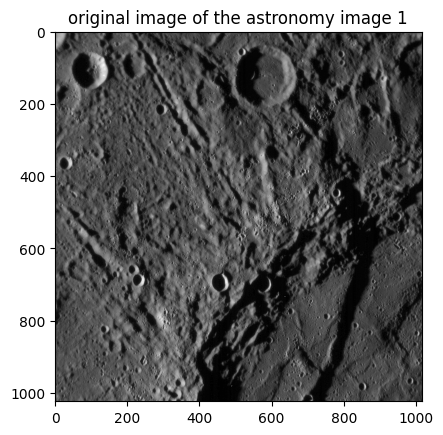

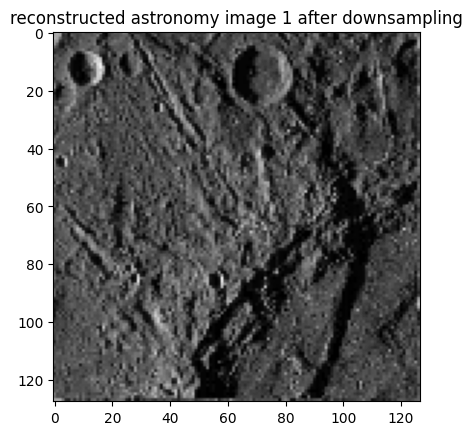

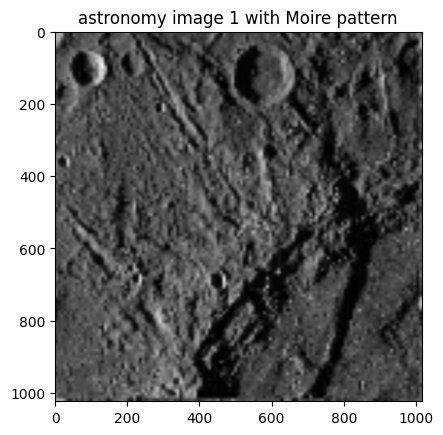

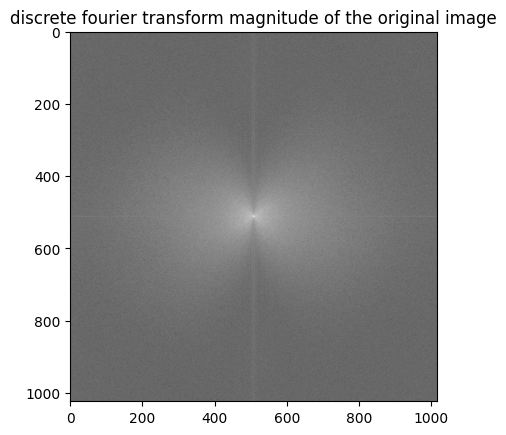

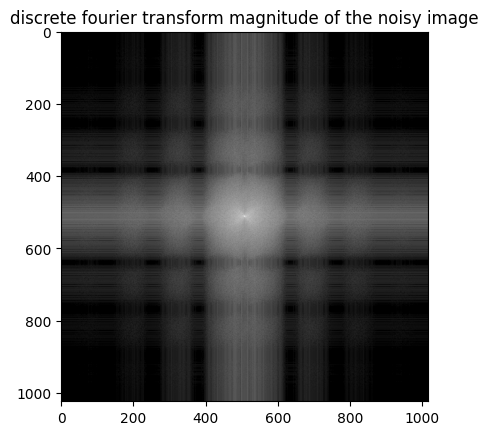

In [5]:
def get_img_fft_shift(img):
    img_fft = np.fft.fft2(img)
    img_fft_shift = np.fft.fftshift(img_fft)
    return img_fft_shift


def show_DFT_magnitude(img_fft_shift, title):
    # img_fft = np.fft.fft2(img)
    # img_fft_shift = np.fft.fftshift(img_fft)
    plt.imshow(np.abs(img_fft_shift), cmap="gray", norm=LogNorm(vmin=5))
    plt.title(title)
    plt.show()

def restore_Moire_pattern(img_name,sample_rate,gray=True):
    # read the astronomy image
    if gray:
        Img_astronomy_1 = cv2.imread("./../images/"+img_name, cv2.IMREAD_GRAYSCALE)
        Img_astronomy_Moire=add_Moire_pattern(img_name,sample_rate,True)
    else:
        Img_astronomy_1 = cv2.imread("./../images/"+img_name)
        Img_astronomy_1 = cv2.cvtColor(Img_astronomy_1, cv2.COLOR_BGR2RGB)
        Img_astronomy_Moire=add_Moire_pattern(img_name,sample_rate,False)
    
    # print(Img_astronomy_Moire)
    Img_astronomy_1_fft_shift=get_img_fft_shift(Img_astronomy_1)
    Img_astronomy_Moire_fft_shift=get_img_fft_shift(Img_astronomy_Moire)
    show_DFT_magnitude(Img_astronomy_1_fft_shift,"discrete fourier transform magnitude of the original image")
    show_DFT_magnitude(Img_astronomy_Moire_fft_shift,"discrete fourier transform magnitude of the noisy image")

restore_Moire_pattern("astronomy_img_mercury.jpg",8,True)
        

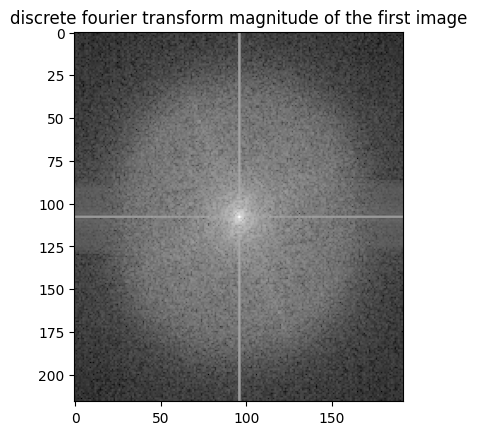

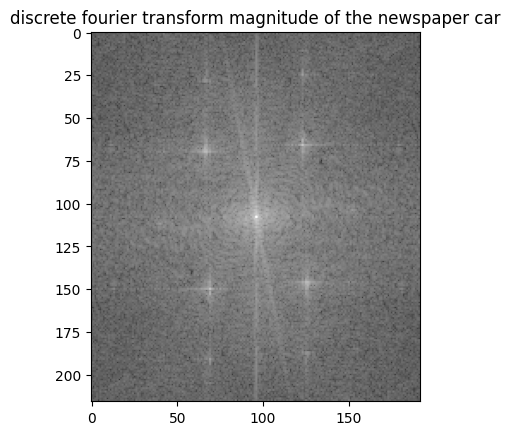

In [6]:
# second approach, borrow Moire pattern from given image degraded by Moire pattern
# add the borrowed pattern in the frequency domain into the original image to create the Moire pattern

img_name_1="astronomy_img_1.png"
Img_astronomy_1=cv2.imread("./../images/"+img_name_1, cv2.IMREAD_GRAYSCALE)
Img_astronomy_1_fft_shift=get_img_fft_shift(Img_astronomy_1)
show_DFT_magnitude(Img_astronomy_1_fft_shift,"discrete fourier transform magnitude of the first image")

# img_name_2="astronomy_img_mercury.jpg"
# Img_astronomy_2=cv2.imread("./../images/"+img_name_2, cv2.IMREAD_GRAYSCALE)
# Img_astronomy_2_fft_shift=get_img_fft_shift(Img_astronomy_2)
# show_DFT_magnitude(Img_astronomy_2_fft_shift,"discrete fourier transform magnitude of the second image")

# read the newspaper image
img_newspaper_name="car_newsprint.tif"
Img_newspaper=cv2.imread("./../images/"+img_newspaper_name, cv2.IMREAD_GRAYSCALE)
Img_newspaper=cv2.resize(Img_newspaper,dsize=(192,216),interpolation=cv2.INTER_LINEAR)
Img_newspaper_fft_shift = get_img_fft_shift(Img_newspaper)
show_DFT_magnitude(Img_newspaper_fft_shift,"discrete fourier transform magnitude of the newspaper car")


C:\Users\Louis0326\AppData\Local\Temp\ipykernel_3292\1432654880.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  H_BHPF[u, v] = 1 / (1 + (D0 / D[u, v]) ** (2 * n))


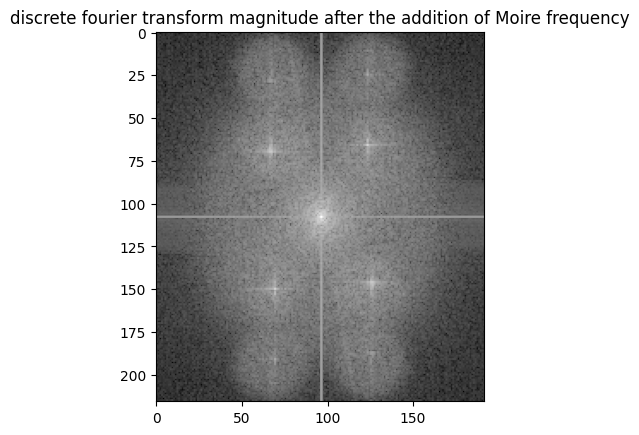

In [7]:
# create a notchpass filter and multiply it with the DFT of the newspaper car
# implement Butterworth high pass filter
def BHPF(M, N, D0, n, uk, vk):
    H_BHPF = np.zeros((M, N))
    D = np.zeros((M, N))
    for u in range(M):
        for v in range(N):
            D[u, v] = np.sqrt((u - M / 2 - uk) ** 2 + (
                    v - N / 2 - vk) ** 2)  # euclidean distance from (u,v) to ((uk,vk) related to center)
            H_BHPF[u, v] = 1 / (1 + (D0 / D[u, v]) ** (2 * n))
    return H_BHPF


# implement Butterworth notch reject filter
def notchFilter(img, n, UV_set):  # n is the parameter of the Butterworth highpass filter
    # Q is the number of Butterworth highpass filter pairs
    M, N = img.shape
    # initialize the filter
    H_notch = np.zeros((M, N))
    length_set = len(UV_set)
    for i in range(length_set):
        uk, vk, D0 = UV_set[i]
        if i == 0:
            H_notch = BHPF(M, N, D0, n, uk, vk) * BHPF(M, N, D0, n, -uk, -vk)
        else:
            H_notch = H_notch * BHPF(M, N, D0, n, uk, vk) * BHPF(M, N, D0, n, -uk, -vk)
    return H_notch

n=4
UV_set_newspaper=[(42, -28, 20), (84, -28, 20), (-42, -28, 20), (-84, -28, 20)]
# get the notch pass filter
Img_newspaper_notch_pass=1-notchFilter(Img_newspaper,n,UV_set_newspaper)
# add the Moire pattern
Img_astronomy_1_fft_shift_added=Img_astronomy_1_fft_shift+Img_newspaper_notch_pass*Img_newspaper_fft_shift
show_DFT_magnitude(Img_astronomy_1_fft_shift_added,"discrete fourier transform magnitude after the addition of Moire frequency")


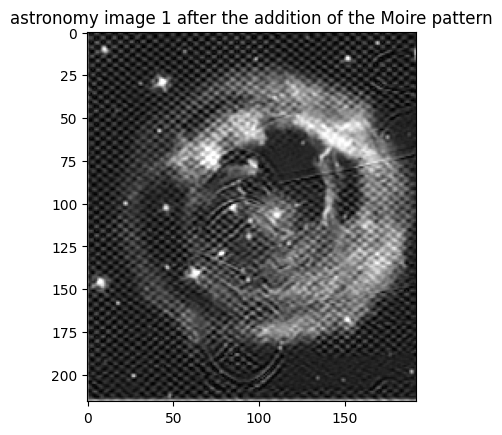

In [8]:
# use the inverse fourier transformation to view the image after the addition of the Moire pattern
def img_ifft(img_fft_shift): 
    Img_inverse_fft_shift = np.fft.ifftshift(img_fft_shift)
    Img_inverse_fft=np.fft.ifft2(Img_inverse_fft_shift)
    Img_inverse_fft=np.abs(Img_inverse_fft)
    return Img_inverse_fft

Img_astronomy_1_added_Moire=img_ifft(Img_astronomy_1_fft_shift_added)
display_img(Img_astronomy_1_added_Moire,"astronomy image 1 after the addition of the Moire pattern")


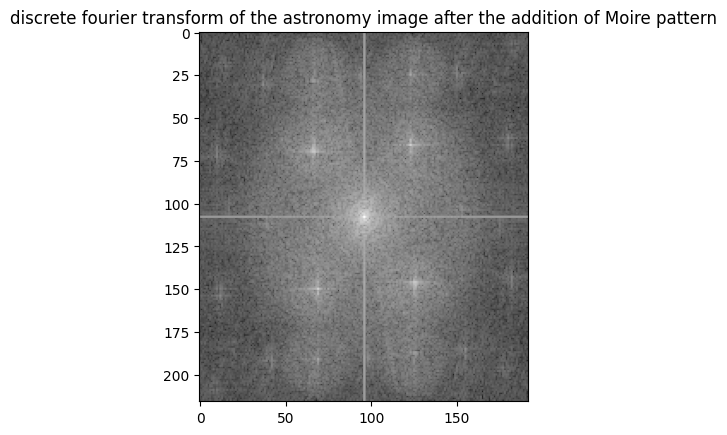

C:\Users\Louis0326\AppData\Local\Temp\ipykernel_3292\1432654880.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  H_BHPF[u, v] = 1 / (1 + (D0 / D[u, v]) ** (2 * n))


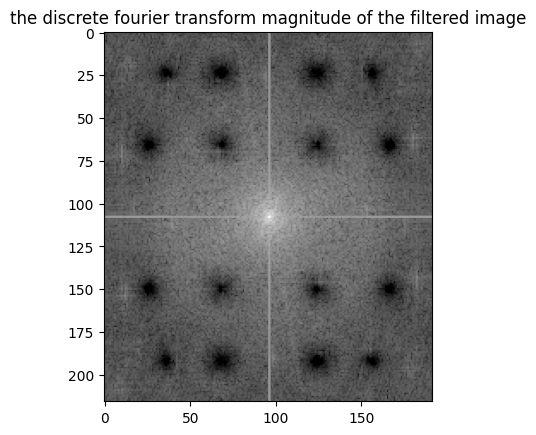

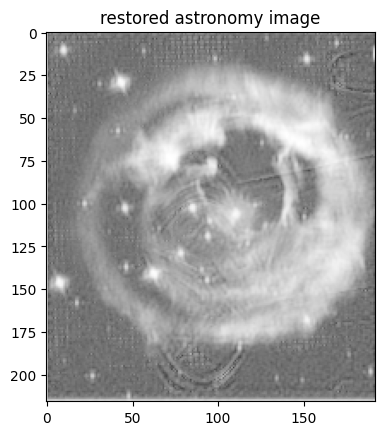

In [16]:
# restore the degraded noise
Img_astronomy_1_added_Moire_fft_shift=get_img_fft_shift(Img_astronomy_1_added_Moire)
show_DFT_magnitude(Img_astronomy_1_added_Moire_fft_shift,
                   "discrete fourier transform of the astronomy image after the addition of Moire pattern")


# set the parameters of the u_k, v_k, and D0
# they denote the location we want to reject, and the extent we want to reject it
UV_set_astronomy=[(42, -28, 20), (84, -28, 20), (-42, -28, 20), (-84, -28, 20),
                  (42,70,10),(84,60,10),(42,-70,10),(84,-60,10)]

# set the parameter n of the notch filter
n=1.5

# use notch butterworth reject filter
Img_astronomy_1_notch_reject=notchFilter(Img_astronomy_1_added_Moire,n,UV_set_astronomy)

# multiply the notch butterworth reject filter with the frequency response of the image with Moire pattern addition
Img_astronomy_1_Moire_restored_fft_shift=Img_astronomy_1_added_Moire_fft_shift*Img_astronomy_1_notch_reject
# display the magnitude of the filtered image
show_DFT_magnitude(Img_astronomy_1_Moire_restored_fft_shift,
                   "the discrete fourier transform magnitude of the filtered image")

# use inverse fourier transformation to get back the restored astronomy image
Img_astronomy_1_Moire_restored=img_ifft(Img_astronomy_1_Moire_restored_fft_shift)
show_DFT_magnitude(Img_astronomy_1_Moire_restored,"restored astronomy image")


